# Comparing NBA champions Win% throughout history

**Author**: Evandro Rodrigues

The purpose of this iPython Notebook is to make a brief comparison on the three biggest NBA Champions (Los Angeles Lakers, Boston Celtics and Golden State Warriors). I'll be using the Win % over tenths of years, starting from 1950 to 2020.

## Importations and Settings

### Importing libraries

In [23]:
# Needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

### Settings

In [24]:
# Defining the Matplotlib backend

%matplotlib inline

## Reading the data

In [25]:
# Choosing the columns that we're going to use

columns_to_use = ['Season', 'Wins', 'Losses', 'Win%']

In [26]:
# Reading team's data

lakers_df = pd.read_csv('data/los_angeles_lakers_data.csv', usecols=columns_to_use, skiprows=[1])
celtics_df = pd.read_csv('data/boston_celtics_data.csv', usecols=columns_to_use, skiprows=[1, 2, 3, 4])
warriors_df = pd.read_csv('data/golden_state_warriors_data.csv', usecols=columns_to_use, skiprows=[1])
bulls_df = pd.read_csv('data/chicago_bulls_data.csv', usecols=columns_to_use)
spurs_df = pd.read_csv('data/san_antonio_spurs_data.csv', usecols=columns_to_use)

## Data Preprocessing

In [27]:
# Extracting the number of seasons from the oldest team

seasons = celtics_df['Season'].to_list()

# Creating a list of years in tenths from 1960 to 2020

years = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']

In [28]:
# Generate the list of means

def means(winsper):
    iteration = 0
    temp_sum = 0
    means_list = []

    for value in winsper:
        if iteration == 10:
            means_list.append(round((temp_sum / 10), 3))
            temp_sum = 0
            iteration = 0
        
        iteration += 1
        temp_sum += value
        
    means_list.append(round((temp_sum / 10), 3))
    
    return means_list        

In [29]:
# Listing the Win% means of every 10 years for each team

celtics_means = means(celtics_df['Win%'].to_list())
lakers_means = means(lakers_df['Win%'].to_list())
warriors_means = means(warriors_df['Win%'].to_list())

In [30]:
# Listing the global Win% mean between every team

global_mean = [((celtics_df['Win%'][i] + lakers_df['Win%'][i] + warriors_df['Win%'][i]) / 3) for i in range(7)]

## Data Visualization

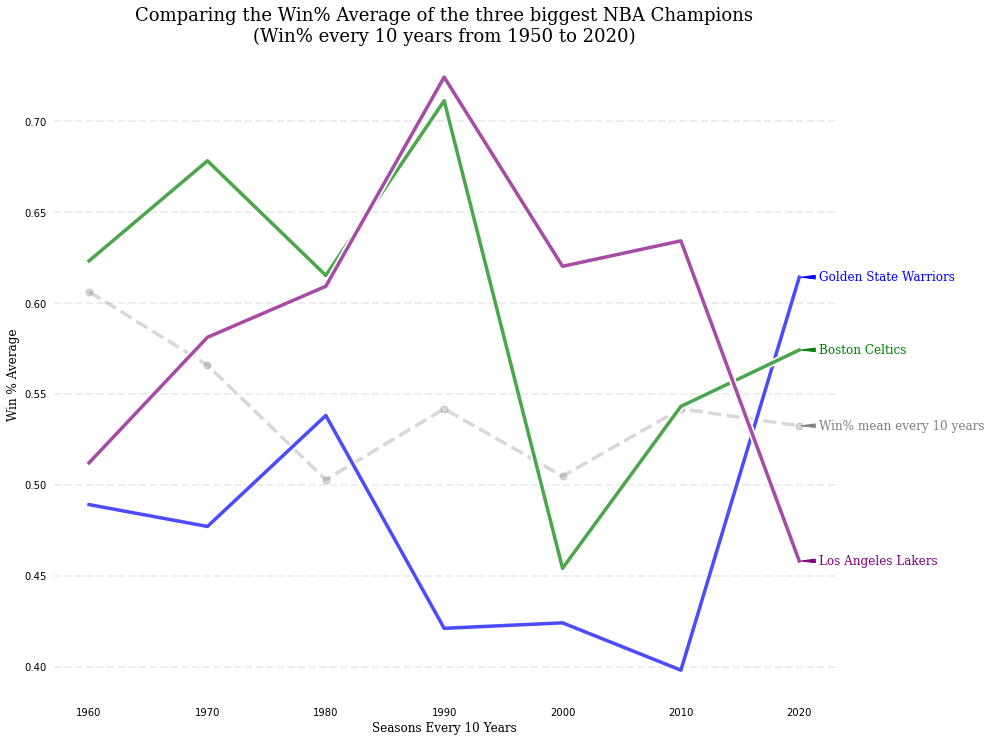

In [31]:
# Creating the figure

plt.figure(figsize=(14, 12))

# Adding data

plt.plot(years, global_mean, aa=True, alpha=0.3, c='gray', ls='--', lw=3.5)
plt.scatter(years, global_mean, alpha=0.3, c='gray', s=50)
plt.plot(years, warriors_means, aa=True, alpha=0.7, c='blue', lw=3.5, path_effects=[pe.Stroke(linewidth=7, foreground='w'), pe.Normal()])
plt.plot(years, celtics_means, aa=True, alpha=0.7, c='green', lw=3.5, path_effects=[pe.Stroke(linewidth=7, foreground='w'), pe.Normal()])
plt.plot(years, lakers_means, aa=True, alpha=0.7, c='purple', lw=3.5, path_effects=[pe.Stroke(linewidth=7, foreground='w'), pe.Normal()])

# Customizing the chart

# Adding title and axis labels
plt.title("Comparing the Win% Average of the three biggest NBA Champions\n(Win% every 10 years from 1950 to 2020)", fontsize=18, family='serif')
plt.xlabel("Seasons Every 10 Years", fontsize=12, family='serif')
plt.ylabel("Win % Average", fontsize=12, family='serif')

# Adding annotations
plt.annotate('Win% mean every 10 years', (years[-1], global_mean[-1]), textcoords = "offset points", xytext=(20, -3), color='gray', arrowprops=dict(color='gray', arrowstyle='wedge'), fontsize=12, family='serif')
plt.annotate('Boston Celtics', (years[-1], celtics_means[-1]), textcoords = "offset points", xytext=(20, -3), color='green', arrowprops=dict(color='green', arrowstyle='wedge'), fontsize=12, family='serif')
plt.annotate('Los Angeles Lakers', (years[-1], lakers_means[-1]), textcoords = "offset points", xytext=(20, -3), color='purple', arrowprops=dict(color='purple', arrowstyle='wedge'), fontsize=12, family='serif')
plt.annotate('Golden State Warriors', (years[-1], warriors_means[-1]), textcoords = "offset points", xytext=(20, -3), color='blue', arrowprops=dict(color='blue', arrowstyle='wedge'), fontsize=12, family='serif')

# Setting up the figure
plt.gca().margins(x=0.05)
plt.grid(axis='y', color='lightgray', linestyle='--', linewidth=2, alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().yaxis.set_ticks_position("none")
plt.gca().xaxis.set_ticks_position("none")

# Saving the chart

plt.gcf().savefig('comparison_result.png', bbox_inches="tight", dpi=300)

# Showing the chart

plt.show()